In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv(r"C:\Users\97798\Desktop\archive\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Distribution of Target




<Axes: ylabel='count'>

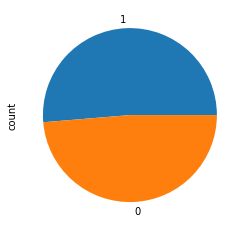

In [9]:
data.target.value_counts().plot(kind ="pie", autopct = '')

In [11]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
X = data.drop(['target'], axis =1)

In [15]:
y = data.target

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 20)


In [22]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
391,45,1,3,110,264,0,1,132,0,1.2,1,0,3
36,51,1,3,125,213,0,0,125,1,1.4,2,1,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
132,41,1,1,135,203,0,1,132,0,0.0,1,0,1
686,52,1,0,128,204,1,1,156,1,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,46,1,0,140,311,0,1,120,1,1.8,1,2,3
924,61,0,0,130,330,0,0,169,0,0.0,2,0,2
223,39,0,2,94,199,0,1,179,0,0.0,2,0,2
271,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [23]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [24]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [26]:
data.columns[var_thres.get_support()]


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [28]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

0


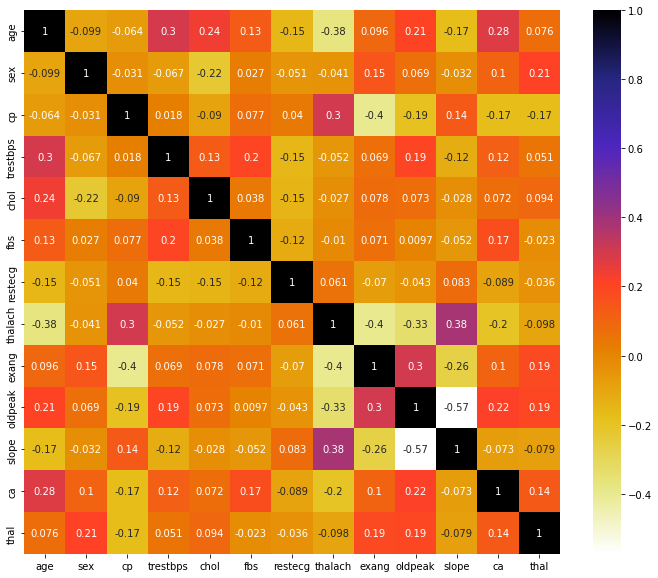

In [30]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [31]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

0

In [36]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.06679735, 0.02099181, 0.12834907, 0.07059308, 0.23615208,
       0.        , 0.03506021, 0.16332002, 0.09735532, 0.16568414,
       0.07569242, 0.1426457 , 0.16737595])

In [37]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)


chol        0.236152
thal        0.167376
oldpeak     0.165684
thalach     0.163320
ca          0.142646
cp          0.128349
exang       0.097355
slope       0.075692
trestbps    0.070593
age         0.066797
restecg     0.035060
sex         0.020992
fbs         0.000000
dtype: float64

<Axes: >

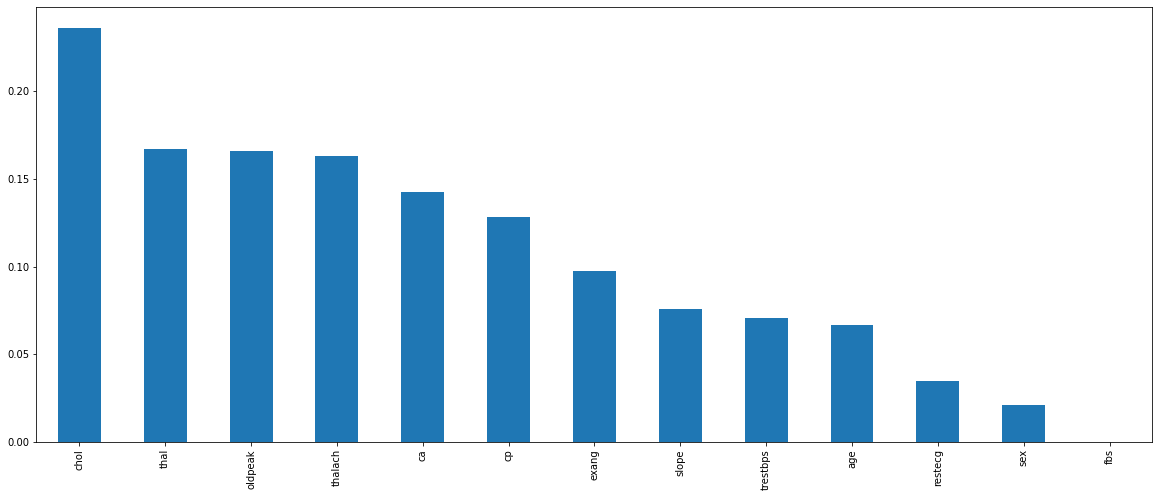

In [38]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [39]:
from sklearn.feature_selection import SelectKBest


In [42]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')

In [160]:
sel_five_cols.get_feature_names_out()

array(['Loan Amount', 'Term', 'Grade', 'Verification Status',
       'Collection Recovery Fee', 'Batch Enrolled_BAT2078974',
       'Sub Grade_C4', 'Loan Title_Credit card refinancing',
       'Loan Title_Debt consolidation', 'Application Type_JOINT'],
      dtype=object)

In [44]:
cat_features = x_train.select_dtypes(include="object")
num_features = x_train.select_dtypes(exclude = "object")

In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)


In [82]:
from tabulate import tabulate  # Import the tabulate library


In [83]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a function to evaluate different models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    
    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

+------------------------------+------------+-------------+----------+------------+--------------------+
| Model                        |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+==============================+============+=============+==========+============+====================+
| Logistic Regression          |   0.795122 |    0.756303 | 0.873786 |   0.810811 | [[73 29]           |
|                              |            |             |          |            |  [13 90]]          |
+------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier     |   0.985366 |    1        | 0.970874 |   0.985222 | [[102   0]         |
|                              |            |             |          |            |  [  3 100]]        |
+------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifier |   0.931707 |    0.9158

+--------------------------+------------+-------------+----------+------------+--------------------+
| Model                    |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+==========================+============+=============+==========+============+====================+
| Random Forest Classifier |   0.985366 |           1 | 0.970874 |   0.985222 | [[102   0]         |
|                          |            |             |          |            |  [  3 100]]        |
+--------------------------+------------+-------------+----------+------------+--------------------+

The model with the highest accuracy is: Random Forest Classifier (Accuracy: 0.9854)


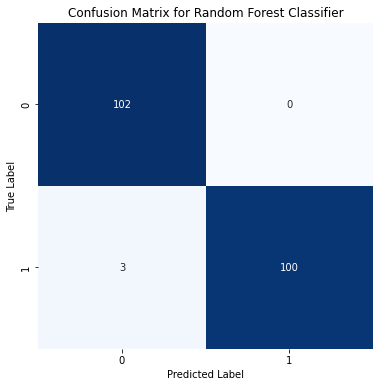

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a function to evaluate different models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    
    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {
    
    'Random Forest Classifier': RandomForestClassifier()
    
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

plt.figure(figsize=(6, 6))
sns.heatmap(results[max_accuracy_index][-1], annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [86]:
# Evaluate and print classification metrics for different models
from sklearn.model_selection import cross_val_score


for model_name, model in models.items():
    # Use cross_val_score for cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    accuracy_mean = np.mean(cv_scores)
    accuracy_std = np.std(cv_scores)
    
    results.append([model_name, accuracy_mean, accuracy_std])

# Print the results in a tabular form
for result in results:
    print(f" Cross-Validation Accuracy Mean: {result[1]:.4f} ")


 Cross-Validation Accuracy Mean: 0.9854 
 Cross-Validation Accuracy Mean: 0.9971 


In [87]:
model

RandomForestClassifier()

In [88]:
from joblib import dump, load


In [97]:
dump(pipe, 'heart.pkl')

['heart.pkl']

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming you have already defined your pipeline 'pipe' and X, y
kfold_validation=KFold(4)

# Perform k-fold cross-validation (e.g., 5-fold)
k = 5 # You can adjust the number of folds as needed
accuracy_scores = cross_val_score(pipe, X, y, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy Scores for Each Fold:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Fold {i + 1}: {accuracy:.4f}")
    
mean_accuracy = accuracy_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.3f}")


Accuracy Scores for Each Fold:
Fold 1: 1.0000
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 1.0000
Fold 5: 0.9854
Mean Accuracy: 0.997


In [94]:
 pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])
    

In [95]:
pipe


Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index([], dtype='object')),
                                                 ('num_tnf', StandardScaler(),
                                                  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])